 X TRAIN SHAPE : 
(60000, 28, 28)
 X TEST FLATTENING SHAPE : 
(10000, 784)
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9234 - loss: 0.2616 - val_accuracy: 0.9613 - val_loss: 0.1320
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9663 - loss: 0.1098 - val_accuracy: 0.9698 - val_loss: 0.1035
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9764 - loss: 0.0764 - val_accuracy: 0.9674 - val_loss: 0.1136
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9818 - loss: 0.0583 - val_accuracy: 0.9713 - val_loss: 0.1000
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9852 - loss: 0.0464 - val_accuracy: 0.9743 - val_loss: 0.0930
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.9755 - loss: 0.0848
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


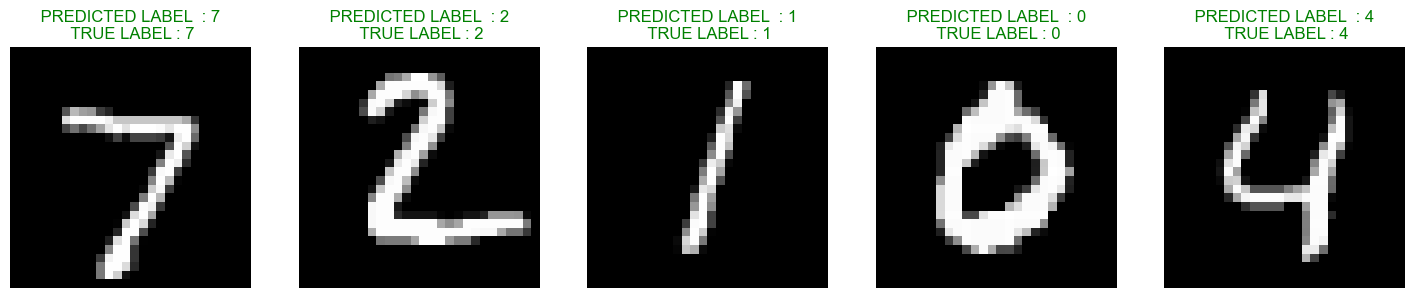

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import  numpy as np
import matplotlib.pyplot as plt



(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0
x_train_flat=x_train.reshape(-1, 28 * 28)
x_test_flat=x_test.reshape(-1, 28 * 28)
print(f" X TRAIN SHAPE : \n{x_train.shape}")
print(f" X TEST FLATTENING SHAPE : \n{x_test_flat.shape}")

model = keras.Sequential([
    layers.Dense(128,activation="relu",input_shape=(784,),name="hidden1"),
    layers.Dense(64,activation="relu",name="hidden2"),
    layers.Dense(10,activation="softmax",name="output")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history =model.fit(x_train_flat,y_train,epochs=5,batch_size=32,validation_split=0.2,verbose=1)
test_loss,test_accuracy=model.evaluate(x_test_flat,y_test)
predictions=model.predict(x_test_flat[:5])

plt.figure(figsize=(18,15))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i],cmap="gray")
    predicted_label=np.argmax(predictions[i])
    true_label=y_test[i]
    color="green" if predicted_label ==true_label else "red"
    plt.title(f" PREDICTED LABEL  : {predicted_label} \n TRUE LABEL : {true_label}",color=color )
    plt.axis("off")
plt.show()